In [1]:
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
quasar_cata = fits.getdata('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/SDSS16Q/DR16Q_v4.fits')

In [3]:
mask = hp.read_map('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/Planck/mask/mask.fits')
dat = hp.read_alm('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/Planck/MV/dat_klm.fits')

image = hp.sphtfunc.alm2map(dat, nside=2048, pol=False)
image_masked = hp.ma(image)
image_masked.mask = np.logical_not(mask)

In [4]:
from astropy import coordinates as coo
from astropy import units as u

In [10]:
c = coo.SkyCoord(ra=quasar_cata['RA']*u.degree, dec=quasar_cata['DEC']*u.degree)

l = c.galactic.l.to(u.rad).value
b = c.galactic.b.to(u.rad).value
pos = hp.ang2vec(theta=np.pi/2-b, phi=l)

In [14]:
quasar_map = np.zeros(hp.nside2npix(2048))

In [16]:
idx = hp.vec2pix(2048, pos[:,0], pos[:,1], pos[:,2])
quasar_map[idx] = 1

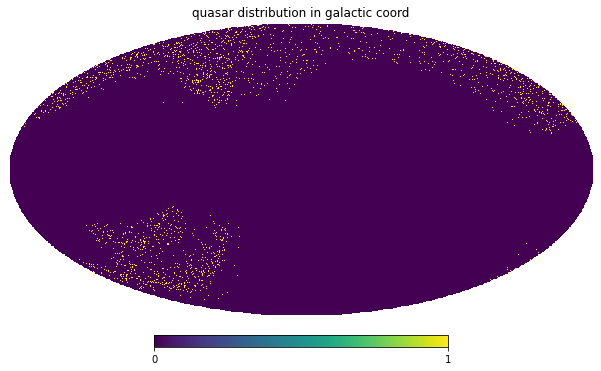

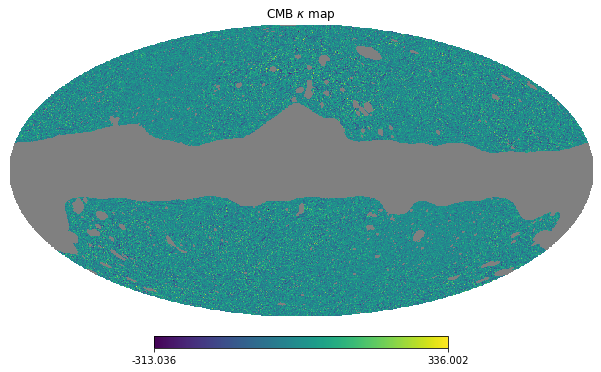

In [17]:
hp.mollview(quasar_map, title='quasar distribution in galactic coord')
hp.mollview(image_masked.filled(), title='CMB $\kappa$ map')

In [5]:
image = np.zeros(hp.nside2npix(100))

In [8]:
image[hp.query_disc(vec=hp.ang2vec(theta=np.pi/4, phi=np.pi/2), radius=np.pi/10, nside=100)] = 1

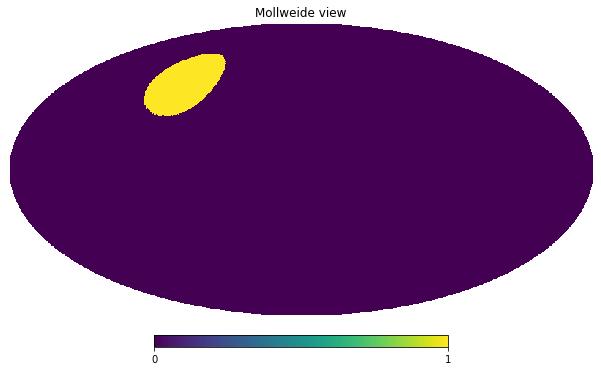

In [9]:
hp.mollview(image)